# Reading raster files with Rasterio

In [34]:
import rasterio
import os
import numpy as np
from rasterio.plot import show
from rasterio.plot import show_hist
from rasterio.mask import mask
import matplotlib.pyplot as plt
from fiona.crs import from_epsg
import geopandas as gpd
import pycrs
%matplotlib inline

# Data dir
data_dir = 'data'
fp = os.path.join(data_dir, "Helsinki_masked_p188r018_7t20020529_z34__LV-FIN.tif")

# Open the file:
raster = rasterio.open(fp)

# Check type of the variable 'raster'
type(raster)

C:\Users\Joe\AppData\Local\Temp\ipykernel_7336\1008405825.py:9: DeprecationWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas still uses PyGEOS by default. However, starting with version 0.14, the default will switch to Shapely. To force to use Shapely 2.0 now, you can either uninstall PyGEOS or set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In the next release, GeoPandas will switch to using Shapely by default, even if PyGEOS is installed. If you only have PyGEOS installed to get speed-ups, this switch should be smooth. However, if you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


rasterio.io.DatasetReader

In [16]:
#projection
raster.crs

CRS.from_wkt('PROJCS["UTM Zone 0, Northern Hemisphere",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-183],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]')

In [17]:
#affine transform
raster.transform

Affine(28.5, 0.0, 698592.0,
       0.0, -28.5, 6697870.5)

In [18]:
#dimensions
print(raster.width)
print(raster.height)

1288
1439


In [19]:
#number of bands
raster.count

7

In [20]:
#bounds of file
raster.bounds

BoundingBox(left=698592.0, bottom=6656859.0, right=735300.0, top=6697870.5)

In [21]:
#data format
raster.driver

'GTiff'

In [22]:
#no data values
raster.nodatavals

(None, None, None, None, None, None, None)

In [23]:
#all metadata
raster.meta

{'driver': 'GTiff',
 'dtype': 'uint8',
 'nodata': None,
 'width': 1288,
 'height': 1439,
 'count': 7,
 'crs': CRS.from_wkt('PROJCS["UTM Zone 0, Northern Hemisphere",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-183],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'),
 'transform': Affine(28.5, 0.0, 698592.0,
        0.0, -28.5, 6697870.5)}

# Get Raster Bands

In [24]:
#read raster band as separate variable
band1 = raster.read(1)

#check type 
print(type(band1))

#data type of the values
print(band1.dtype)

<class 'numpy.ndarray'>
uint8


In [25]:
# Read all bands
array = raster.read()

# Calculate statistics for each band
stats = []
for band in array:
    stats.append({
        'min': band.min(),
        'mean': band.mean(),
        'median': np.median(band),
        'max': band.max()})

# Show stats for each channel
stats

[{'min': 0, 'mean': 59.63132232528628, 'median': 61.0, 'max': 255},
 {'min': 0, 'mean': 43.13342814842951, 'median': 43.0, 'max': 255},
 {'min': 0, 'mean': 36.29418775547201, 'median': 31.0, 'max': 255},
 {'min': 0, 'mean': 35.0946303937776, 'median': 13.0, 'max': 255},
 {'min': 0, 'mean': 37.63263502518571, 'median': 13.0, 'max': 255},
 {'min': 0, 'mean': 105.8221477777442, 'median': 114.0, 'max': 175},
 {'min': 0, 'mean': 26.28348760569581, 'median': 14.0, 'max': 255}]

# Visualizing Raster Layers

he channels for the data used in here and their corresponding wavelengths are:

1.Blue (0.45 - 0.515) 
2.Green (0.525 - 0.605) 
3.Red (0.63 - 0.69) 
4.NIR (0.75 - 0.90) 
5.IR (1.55 - 1.75) 

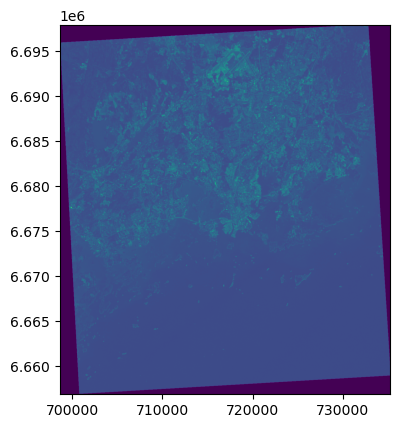

<AxesSubplot:>

In [26]:
#Plot band 1
show((raster, 1))

Text(0.5, 1.0, 'Blue')

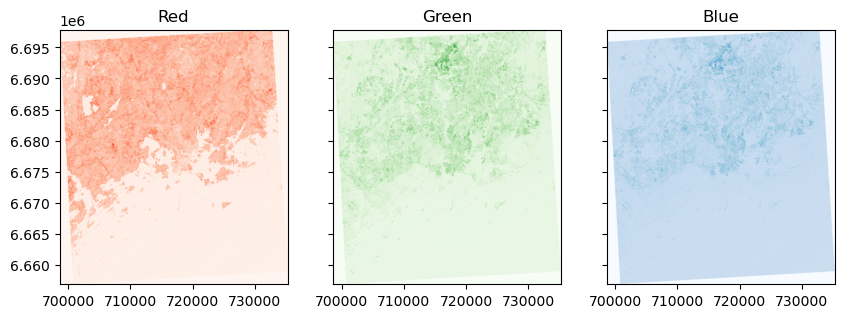

In [27]:
#initialize subplots
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, nrows=1, figsize=(10, 4), sharey=True)

#plot red, green and blue
show((raster, 4), cmap='Reds', ax=ax1)
show((raster, 3), cmap="Greens", ax=ax2)
show((raster, 1), cmap='Blues', ax=ax3)

#add titles
ax1.set_title('Red')
ax2.set_title('Green')
ax3.set_title('Blue')

# RGB True color composite
Next let’s see how we can plot these channels as a normal RGB image.

- First we need to read the bands into numpy arrays and normalize the cell values into scale ranging from 0.0 to 1.0:

In [28]:
#read grid values into numpy arrays
red = raster.read(3)
green = raster.read(2)
blue = raster.read(1)

#function to normalize the grid values
def normalize(array):
    '''Normalize numpy arrays into scale 0.0 - 1.0'''
    array_min, array_max = array.min(), array.max()
    return((array - array_min))/ ((array_max - array_min))

#normalize the bands
redn = normalize(red)
greenn = normalize(green)
bluen = normalize(blue)

print('Normalized bands stats')
print(redn.min(), '-', redn.max(), 'mean:', redn.mean())
print(greenn.min(), '-', greenn.max(), 'mean:', greenn.mean())
print(bluen.min(), '-', bluen.max(), 'mean:', bluen.mean())

Normalized bands stats
0.0 - 1.0 mean: 0.1423301480606746
0.0 - 1.0 mean: 0.16915069862129217
0.0 - 1.0 mean: 0.23384832284425988


Next we need to stack the values from different values together to produce the RGB true color composite. For this we can use Numpy’s dstack() -function:

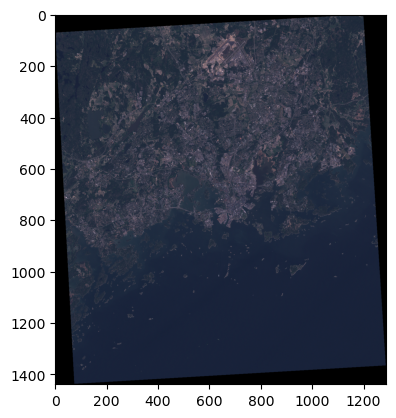

In [29]:
#create RGB natural color composite
rgb = np.dstack((redn, greenn, bluen))

#visualise
plt.imshow(rgb)

# False color composite
Following the previous example, it is easy to create false color composites with different band configurations.

- One of the typical one, is to replace the blue band with near infra-red that can be used to detect vegetation easily where red color is emphasized. Let’s use the same raster file as input, and generate our first false color composite:

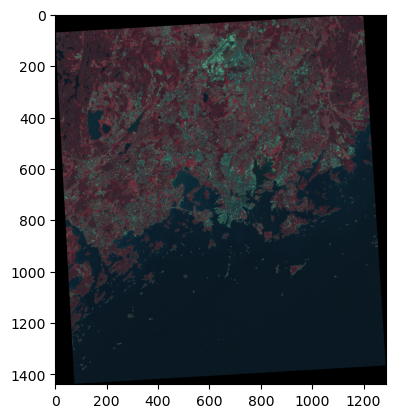

In [32]:
#Read grid values into numpy arrays
nir = raster.read(4)
red = raster.read(3)
green = raster.read(2)

#normalize
nirn = normalize(nir)
redn = normalize(red)
greenn = normalize(green)

#create composite by stacking
nrg = np.dstack((nirn, redn, greenn))

#visualise
plt.imshow(nrg)


# Histogram of Raster data

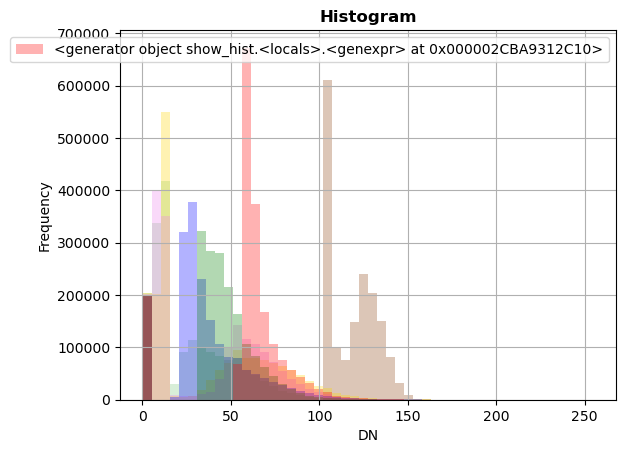

In [33]:
show_hist(raster, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title='Histogram')

Now we can easily see how the wavelengths of different bands are distributed.

# For Masking and Clipping Check Separate Notebook.

# Raster map algebra
Conducting calculations with rasterio is fairly straightforward if the extent etc. matches because the values of the rasters are stored as numpy arrays (similar to the columns stored in Geo/Pandas, i.e. Series).

## Calculating NDVI
we will see how to calculate the NDVI (Normalized difference vegetation index) based on two bands: band-4 which is the Red channel and band-5 which is the Near Infrared (NIR).

36.29418775547201
35.0946303937776
<class 'numpy.ndarray'>


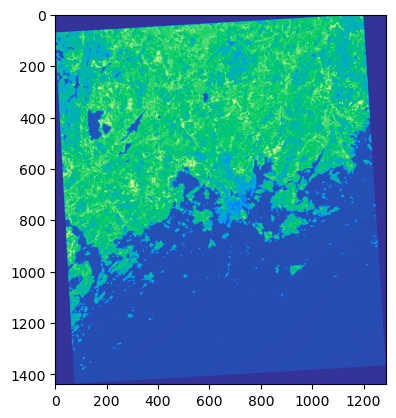

<AxesSubplot:>

In [38]:
'''using the red and nir channels we defined above, we do the analysis'''
#calculate some data stats
print(red.mean())
print(nir.mean())
print(type(nir))

#visualise
show(nir, cmap='terrain')

From the map we can see that NIR channel reflects stronly (light green) in areas outside the Helsinki urban areas.

- Let’s change the data type from uint8 to float so that we can have floating point numbers stored in our arrays:

In [39]:
#convert to floats
red = red.astype('f4')
nir = nir.astype('f4')
nir

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Now we can see that the numbers changed to decimal numbers (there is a dot after the zero).

Next we need to tweak the behaviour of numpy a little bit. By default numpy will complain about dividing with zero values. We need to change that behaviour because we have a lot of 0 values in our data.

In [40]:
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [41]:
#calculate ndvi using numpy arrays
ndvi = (nir - red)/ (nir + red)

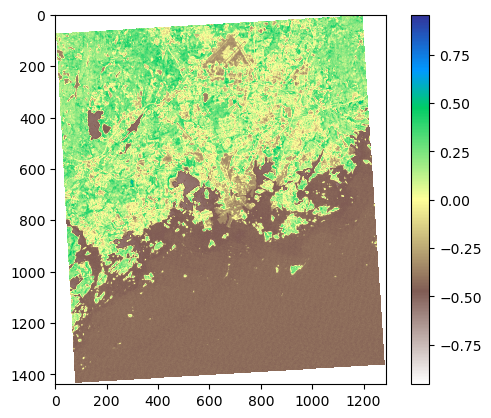

In [42]:
#plot the ndvi
plt.imshow(ndvi, cmap='terrain_r')

#add colorbar to show index
plt.colorbar()

As we can see from the map, now the really low NDVI indices are located in water and urban areas (middle of the map) whereas the areas colored with green have a lot of vegetation according our NDVI index.

# Read Cloud Optimized Geotiffs

- Check Notebook